# Generating images with TML base principles.
This just insert text on the image, its like magic.

I don't trust in magic.

I like magic, but i don't trust.

In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import sys
import os
from os.path import join
import pandas as pd
import re

In [2]:
from functools import *
from concurrent.futures import ProcessPoolExecutor

In [3]:
data = pd.read_csv("data/set.csv")
targets = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

## Testing the stolen methods :)
The original methods are so good (for what they do).

So i only have to adapt the methods to suit my info.

And understand a bit about them.

In [4]:
# I'm not gonna use the targets list because this is only for testing purposes.
train = data[['PT08.S2(NMHC)', 'PT08.S3(NOx)', 
            'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 
            'RH', 'AH', 'datetimestamp']]
target = data['PT08.S1(CO)']

### Text inside the image
It's the worst, not by performance apparently, just because how it works.

In [15]:
font = ImageFont.truetype('JetBrainsMonoNerdFont-Regular.ttf', 7)

def textINimage(event:np.ndarray, size:int=224) -> Image.Image:
    img = Image.fromarray(np.zeros([size,size,3]), 'RGB')
    for i, f in enumerate(event):
        x = ((1/4)+(i%2))*size//2.
        y = (size//11)+((i//2)*2*size//len(event))
        ImageDraw.Draw(img).text((x , y), f'{f:.1f}', fill=(255,255,255), font=font)
    return img


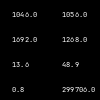

In [17]:
textINimage(train.values[0], size=100)#.save("image.png")

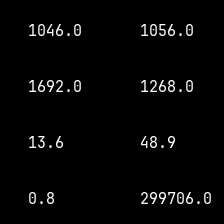

In [18]:
Image.open("image.png")
# Just testing some things about the tensorflow methods :)

### Image as pixels (rectangle pixels?)

In [56]:
def pixelINimage(event:np.ndarray, size:int=100) -> Image.Image:
    arr = np.zeros([size,size], dtype=np.uint8)
    width, height = size//2, 2*size//(len(event))
    for i, f in enumerate(event):
        arr[(i%2)*width:((i%2)+1)*width, (i//2)*height:((i+2)//2)*height] = f
    img = Image.fromarray(np.broadcast_to(arr[:,:,None], [size,size,3]), 'RGB')
    return img


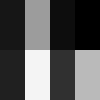

In [61]:
pixelINimage(train.values[0])

# There are 5 targets
So I need to create more than one set of images.

'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)'
```
images
├── CO
│   └── [index].png
```

The base logic of the original notebook, is a bit weird, because it includes a `train` path.

is it ok to use a `ProcessPoolExecutor` to make it faster?

Let's find out.

In [19]:
def save_image(event:np.ndarray, name:str, func, loc:str, size:int=224) -> None:
    func(event, size).save(join(loc,name))

In [20]:
def Generate(df:pd.DataFrame, targets:list, func, path:str='imagesTML', size:int=224): 
    
    for i in targets:
        
        # Create the directory for the image
        name = re.search(r'\((\w+)\)', i).group(1)
        dir_path = join(path, func.__name__, name)
        os.makedirs(dir_path, exist_ok=True)
        
        # create some df to handle each target and each train data
        target = df[i]
        train = df.drop(columns=i)
        index = df.index.values
        
        # Generate the image
        # Im gonna use ProcessPoolExecutor as the original notebook :)
        # party = partial(save_image, func=func, loc=dir_path, size=size)
        # with ProcessPoolExecutor(4) as e: 
        #     e.map(party, train.values, str(str(train.index.values) + "_" + str(target.values) + ".png"))
        # It didn't worked T-T
        for j in index:
            # name = str(j) + "_" + str(target.loc[j]) + ".png
            name = "{:04d}".format(j) + ".png"
            save_image(train.loc[j].values, name, func=func, loc=dir_path, size=size)

        print("Images created at")
        print(dir_path)

        

In [21]:
%%time
Generate(data.drop(columns=['DateTime']), targets, textINimage, size=100)

Images created at
imagesTML/textINimage/CO
Images created at
imagesTML/textINimage/NMHC
Images created at
imagesTML/textINimage/NOx
Images created at
imagesTML/textINimage/NO2
Images created at
imagesTML/textINimage/O3
CPU times: user 25min 22s, sys: 6.03 s, total: 25min 28s
Wall time: 25min 44s


# Test stuff

In [10]:
print("{:04d}".format(0))

0000
